# Image Recognition (with keras)

Example code for the lecture series "Machine Learning for Physicists" by Florian Marquardt

Session 4: Homework for lecture 3

See https://machine-learning-for-physicists.org and the current course website linked there!

This notebook shows how to:
- recognize images (softmax, cross-entropy), using dense layers



### Imports: numpy and matplotlib and keras

In [64]:
# keras: Sequential is the neural-network class, Dense is
# the standard network layer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers # to choose more advanced optimizers like 'adam'

from tqdm import tqdm # progress bar

import numpy as np

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

# for updating display 
# (very simple animation)
from IPython.display import clear_output
from time import sleep

# Telling Lorentzians from Gaussians!

In [65]:
N=100 # number of pixels in 'image'

Net=Sequential()
Net.add(Dense(30,input_shape=(N,), activation="relu"))
Net.add(Dense(20,activation="relu"))
Net.add(Dense(2,activation="softmax"))

Net.compile(loss='categorical_crossentropy', 
            optimizer='adam', 
            metrics=['categorical_accuracy'])


In [66]:
def my_generator1D(batchsize,x): # produce a batch of curves, randomly Lorentzian or Gaussian
    R=np.random.uniform(size=batchsize) # width
    A=np.random.uniform(size=batchsize) # amplitude
    x0=np.random.uniform(size=batchsize,low=-1,high=1) # position
    IsLorentzian=(np.random.uniform(size=batchsize)<0.5)*1.0 # Lorentzian? (==1) or Gaussian?
    Lorentzians=A[:,None]/(((x[None,:]-x0[:,None])/R[:,None])**2+1) # make many random Lorentzians
    Gaussians=A[:,None]*np.exp(-((x[None,:]-x0[:,None])/R[:,None])**2) # make many random Gaussians
    inputLayer=IsLorentzian[:,None]*Lorentzians + (1-IsLorentzian[:,None])*Gaussians # now pick whatever type was decided
    resultLayer=np.zeros([batchsize,2])
    resultLayer[:,0]=IsLorentzian
    resultLayer[:,1]=1-IsLorentzian # we could easily have more than just two categories
    return( inputLayer, resultLayer )



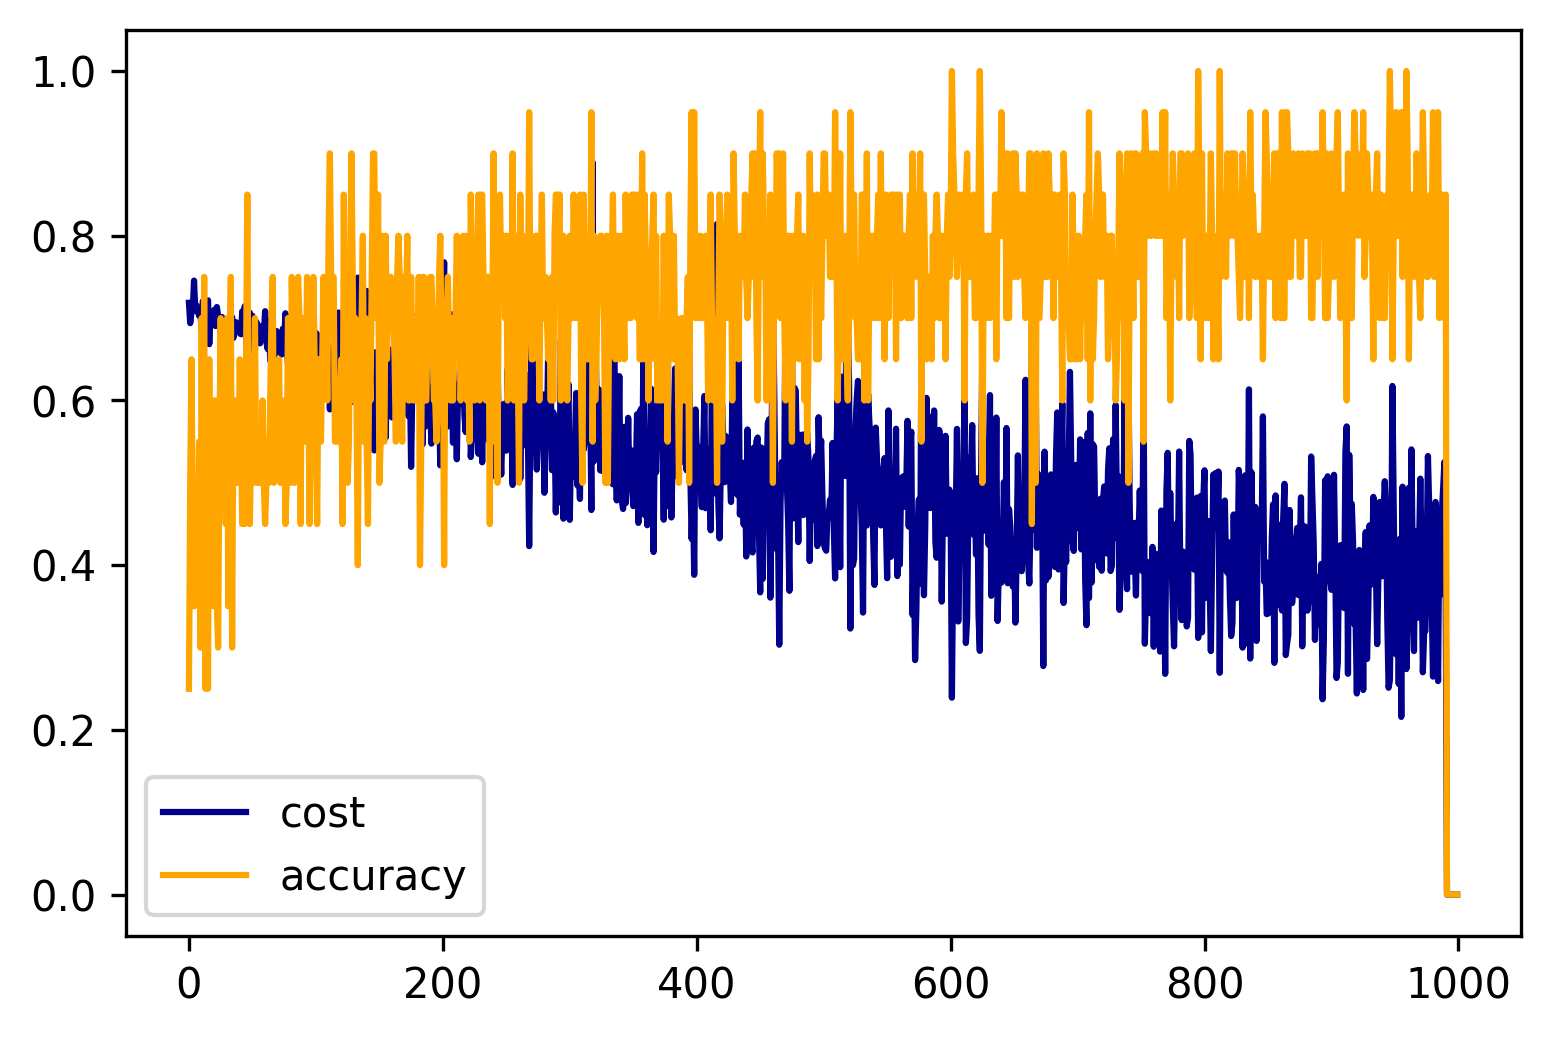

In [67]:
batchsize=20
steps=1000

x=np.linspace(-1,1,N)
costs=np.zeros(steps)
accuracy=np.zeros(steps)
skipsteps=10

for j in range(steps):
    y_in,y_target=my_generator1D(batchsize,x)
    costs[j],accuracy[j]=Net.train_on_batch(y_in,y_target)
    if j%skipsteps==0:
        clear_output(wait=True)
        plt.plot(costs,color="darkblue",label="cost")
        plt.plot(accuracy,color="orange",label="accuracy")
        plt.legend()
        plt.show()

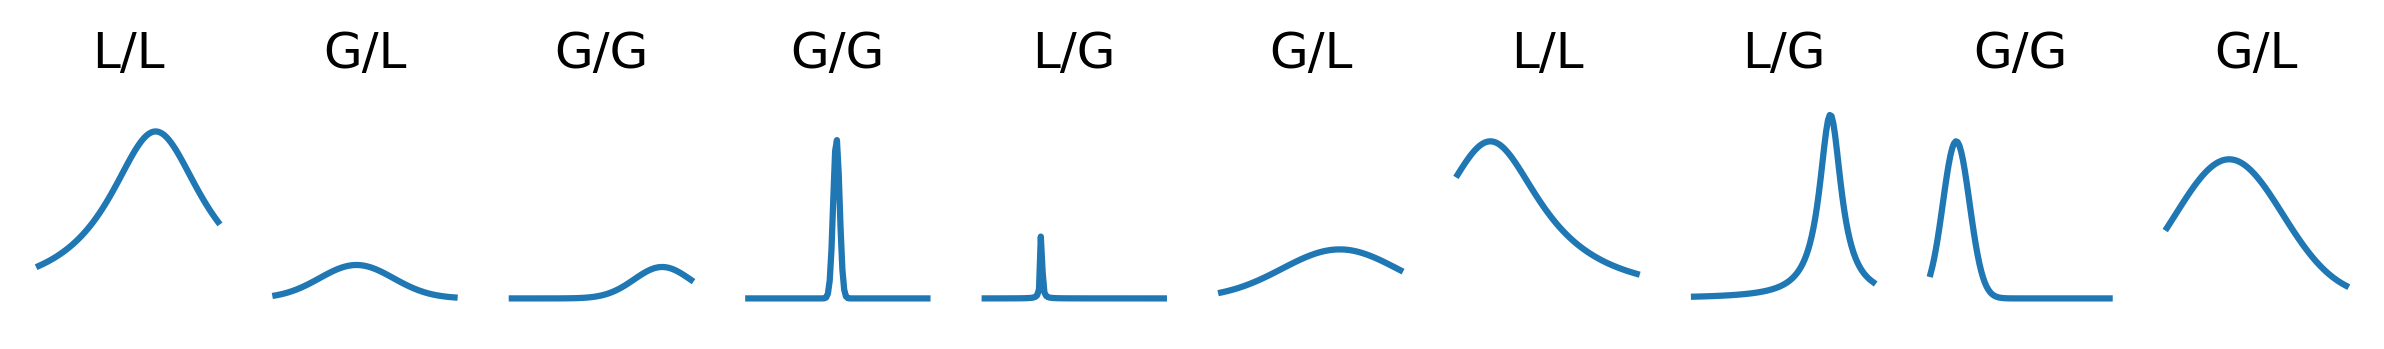

True Category / Network Prediction


In [68]:
# plot some examples:

y_pred=Net.predict_on_batch(y_in)
n_samples=10
fig,ax=plt.subplots(ncols=n_samples,nrows=1,figsize=(10,1))
Name={}
Name[True]="L" # Lorentz
Name[False]="G" # Gauss
for j in range(n_samples):
    ax[j].plot(y_in[j,:])
    ax[j].set_ylim([-0.1,1])
    ax[j].axis('off')
    ax[j].set_title(Name[y_target[j,0]>0.5]+"/"+Name[y_pred[j,0]>0.5])
plt.show()
    
print("True Category / Network Prediction")


# Random circles or squares

In [69]:
# produce random circles or squares in 2D

def my_generator2D(batchsize,x,y):
    R=np.random.uniform(low=0.2,high=1,size=batchsize)
    x0=np.random.uniform(size=batchsize,low=-0.8,high=0.8)
    y0=np.random.uniform(size=batchsize,low=-0.8,high=0.8)
    IsCircle=(np.random.uniform(size=batchsize)<0.5)*1.0 # Circle? (==1) or Square?
    Circles=1.0*((x[None,:]-x0[:,None])**2 + (y[None,:]-y0[:,None])**2 < R[:,None]**2)
    Squares=1.0*(np.abs(x[None,:]-x0[:,None])<R[:,None])*(np.abs(y[None,:]-y0[:,None])<R[:,None])
    inputLayer=IsCircle[:,None]*Circles + (1-IsCircle[:,None])*Squares
    resultLayer=np.zeros([batchsize,2])
    resultLayer[:,0]=IsCircle
    resultLayer[:,1]=1-IsCircle
    return( inputLayer, resultLayer  )



In [70]:
N=20 # number of pixels in 'image'

Net=Sequential()
Net.add(Dense(30,input_shape=(N**2,), activation="relu"))
Net.add(Dense(20,activation="relu"))
Net.add(Dense(2,activation="softmax"))

Net.compile(loss='categorical_crossentropy', 
            optimizer='adam', 
            metrics=['categorical_accuracy'])



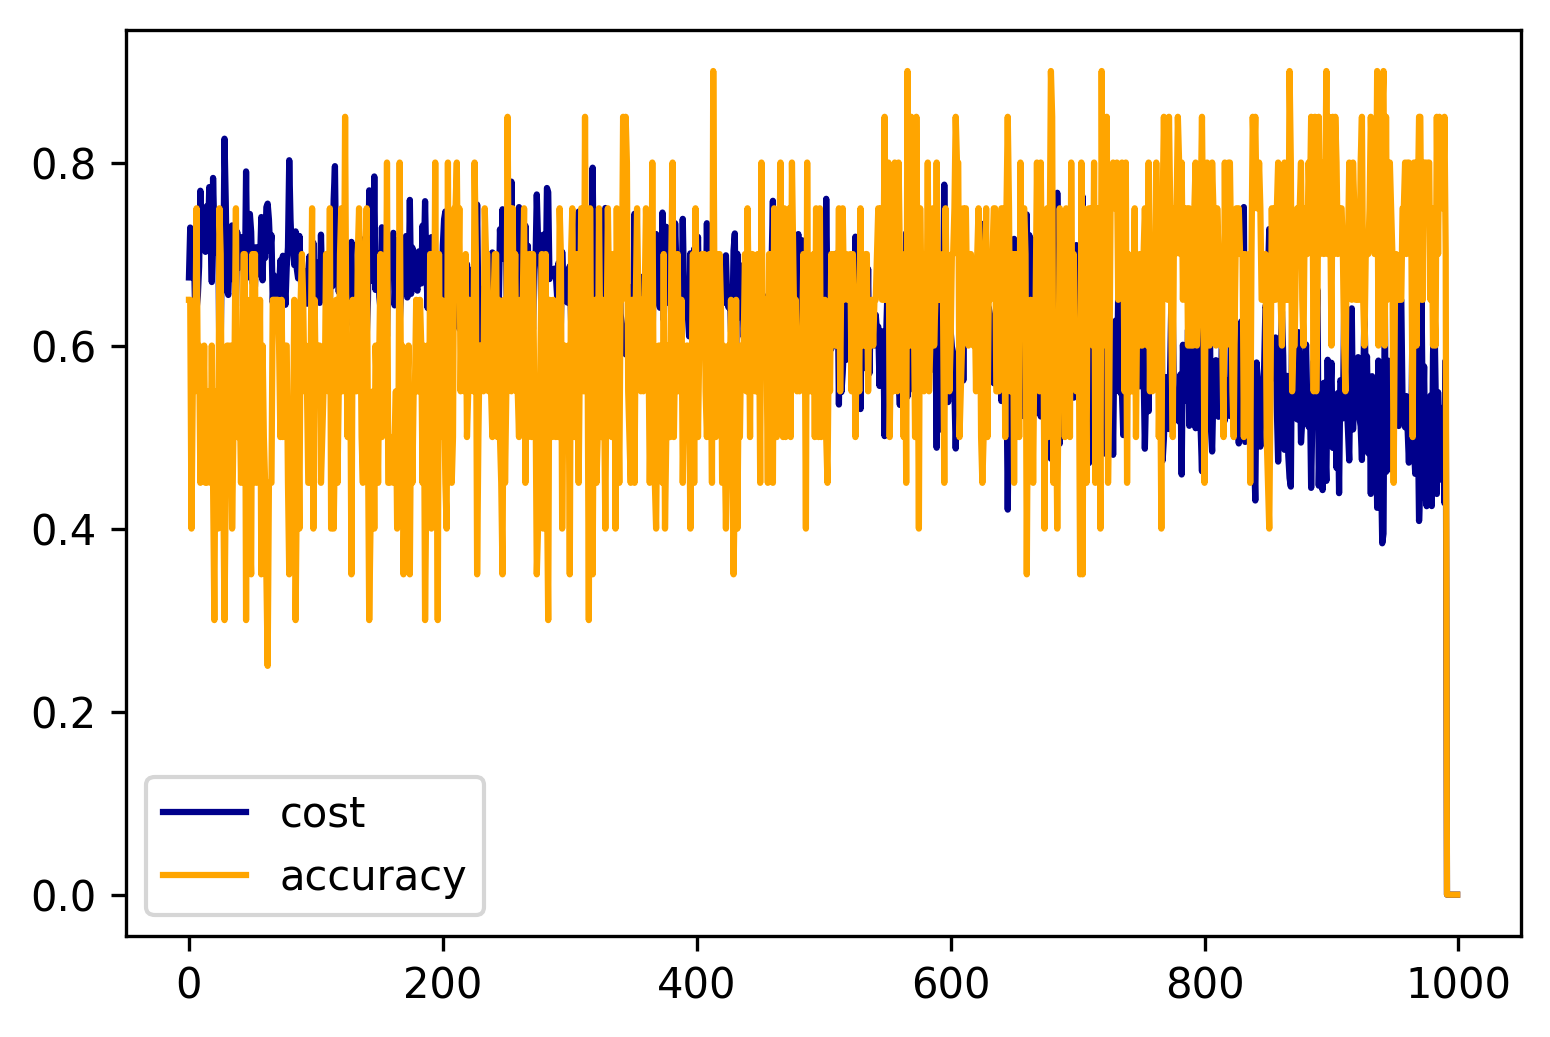

In [71]:
batchsize=20
steps=1000

vals=np.linspace(-1,1,N)
X,Y=np.meshgrid(vals,vals)
x,y=X.flatten(),Y.flatten() # make 1D arrays, as needed for dense layers!

costs=np.zeros(steps)
accuracy=np.zeros(steps)
skipsteps=10

for j in range(steps):
    y_in,y_target=my_generator2D(batchsize,x,y)
    costs[j],accuracy[j]=Net.train_on_batch(y_in,y_target)
    if j%skipsteps==0:
        clear_output(wait=True)
        plt.plot(costs,color="darkblue",label="cost")
        plt.plot(accuracy,color="orange",label="accuracy")
        plt.legend()
        plt.show()

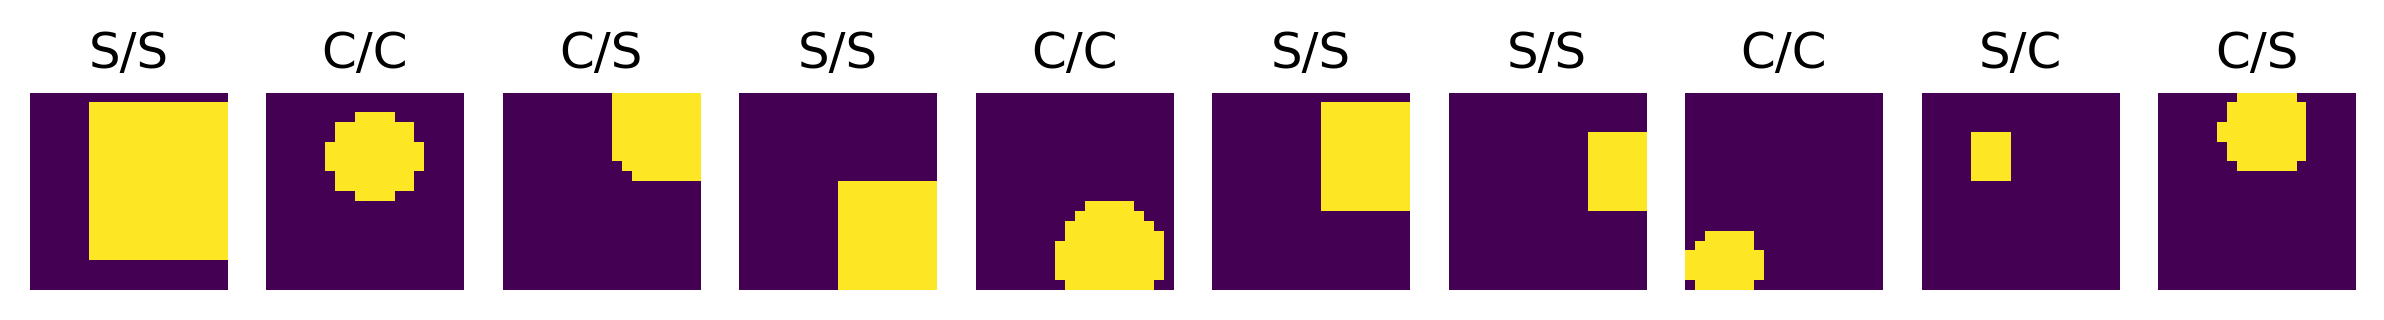

True Category / Network Prediction


In [52]:
# plot some examples:

y_pred=Net.predict_on_batch(y_in)
n_samples=10
fig,ax=plt.subplots(ncols=n_samples,nrows=1,figsize=(10,1))
Name={}
Name[True]="C" # Circle
Name[False]="S" # Square
for j in range(n_samples):
    ax[j].imshow(np.reshape(y_in[j,:],[N,N]),origin='lower')
    ax[j].axis('off')
    ax[j].set_title(Name[y_target[j,0]>0.5]+"/"+Name[y_pred[j,0]>0.5])
plt.show()
    
print("True Category / Network Prediction")
